In [ ]:
import pandas as pd
import matplotlib .pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
data=pd.read_csv("/content/greendestination (1) (1).csv")

In [9]:
data.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [10]:
total_employees = len(data)
attrition_count = data[data["Attrition"] == "Yes"].shape[0]
attrition_rate = (attrition_count / total_employees) * 100

print("Total Employees:", total_employees)
print("Employees Left:", attrition_count)
print("Attrition Rate:", round(attrition_rate, 2), "%")

Total Employees: 1470
Employees Left: 237
Attrition Rate: 16.12 %


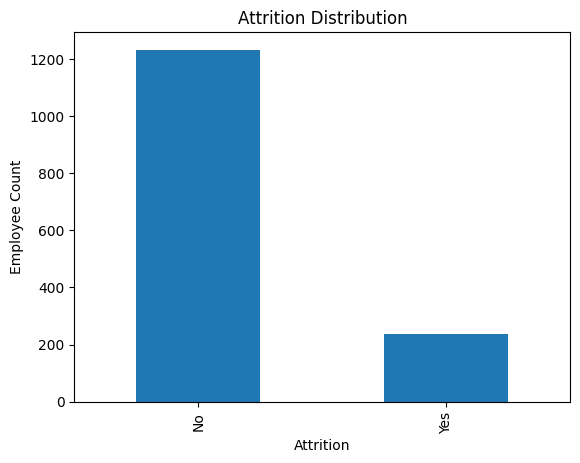

In [11]:
data["Attrition"].value_counts().plot(kind="bar")
plt.title("Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Employee Count")
plt.show()

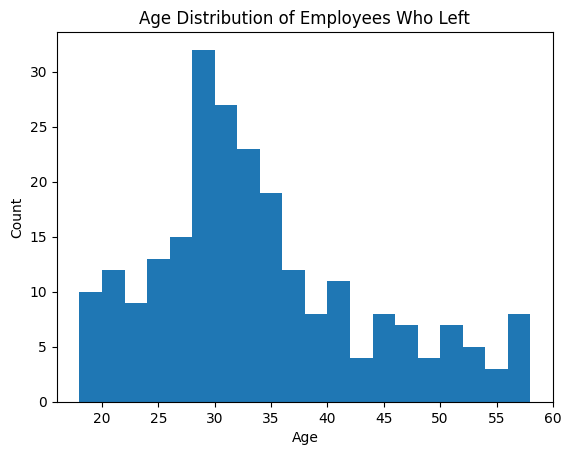

In [12]:
plt.hist(data[data["Attrition"] == "Yes"]["Age"], bins=20)
plt.title("Age Distribution of Employees Who Left")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-4097059852.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


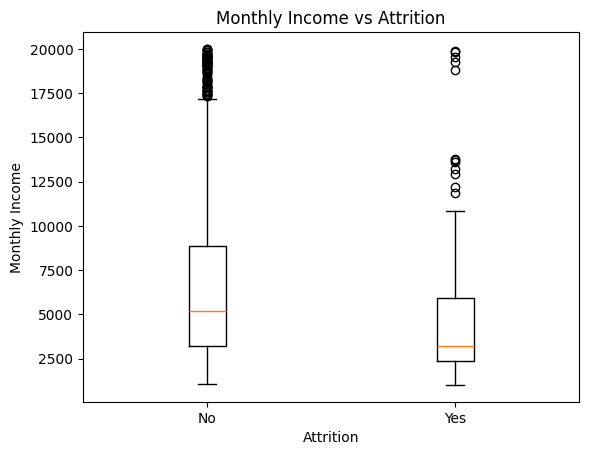

In [13]:
plt.boxplot([
    data[data["Attrition"] == "No"]["MonthlyIncome"],
    data[data["Attrition"] == "Yes"]["MonthlyIncome"]
], labels=["No", "Yes"])
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

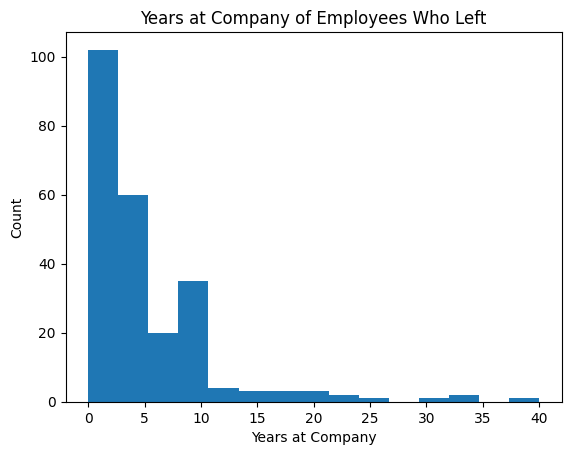

In [14]:
plt.hist(data[data["Attrition"] == "Yes"]["YearsAtCompany"], bins=15)
plt.title("Years at Company of Employees Who Left")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

In [15]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Copy dataset to avoid modifying original data
ml_data = data.copy()

In [17]:
# Convert target variable to numeric
# Yes = 1 (Employee left), No = 0 (Employee stayed)
ml_data["Attrition"] = ml_data["Attrition"].map({"Yes": 1, "No": 0})

In [18]:
# Encode categorical columns using Label Encoding
label_encoder = LabelEncoder()

for column in ml_data.select_dtypes(include="object").columns:
    ml_data[column] = label_encoder.fit_transform(ml_data[column])

In [19]:
# Drop unnecessary columns that do not help prediction
ml_data = ml_data.drop([
    "EmployeeNumber",
    "EmployeeCount",
    "Over18",
    "StandardHours"
], axis=1)

In [20]:
# Separate features (X) and target (y)
X = ml_data.drop("Attrition", axis=1)
y = ml_data["Attrition"]

In [21]:
# Split the data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [23]:
# Predict on test data
y_pred = model.predict(X_test)

In [24]:
# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

Model Accuracy: 87.76 %


In [25]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294



In [26]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[252   3]
 [ 33   6]]


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Initialize Random Forest with optimized parameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [30]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")

Random Forest Accuracy: 87.76 %


In [31]:
# Detailed performance
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
[[254   1]
 [ 35   4]]


In [32]:

# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [33]:
# Display top 10 important features
print(feature_importance.head(10))

              Feature  Importance
15      MonthlyIncome    0.088905
18           OverTime    0.083812
0                 Age    0.059531
23  TotalWorkingYears    0.052112
2           DailyRate    0.048325
4    DistanceFromHome    0.048057
16        MonthlyRate    0.046727
9          HourlyRate    0.043987
26     YearsAtCompany    0.041216
22   StockOptionLevel    0.038515


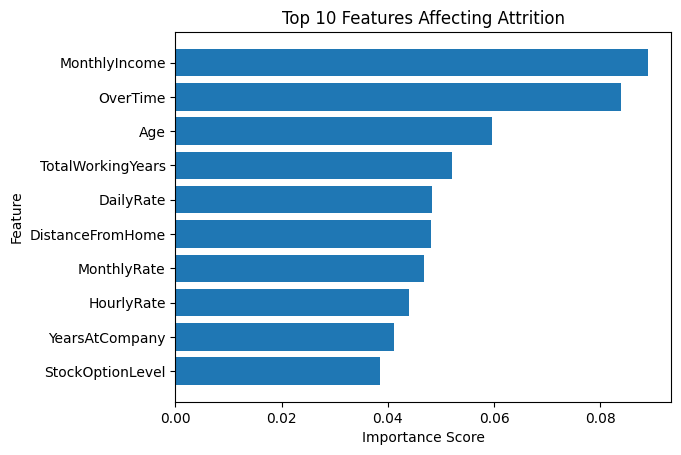

In [34]:
plt.figure()
plt.barh(
    feature_importance["Feature"].head(10),
    feature_importance["Importance"].head(10)
)
plt.title("Top 10 Features Affecting Attrition")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Employee Attrition Analysis – Green Destinations

## Project Overview
This project analyzes employee attrition at Green Destinations, a travel agency experiencing increased employee turnover. The objective is to identify key factors influencing attrition and build a predictive machine learning model.

## Objectives
- Calculate employee attrition rate
- Perform exploratory data analysis (EDA)
- Identify factors affecting attrition
- Build and optimize machine learning models
- Provide actionable HR insights

## Dataset
- Records: 1,470 employees
- Features: Demographic, job-related, salary, and experience attributes
- Target Variable: Attrition (Yes / No)

## Tools & Technologies
- Python
- Pandas, Matplotlib
- Scikit-learn
- Jupyter Notebook

## Methodology
1. Data Cleaning & Preprocessing
2. Exploratory Data Analysis
3. Feature Encoding
4. Model Building:
   - Logistic Regression (baseline)
   - Random Forest (optimized)
5. Model Evaluation
6. Feature Importance Analysis

## Results
- Attrition Rate: ~16%
- Random Forest outperformed Logistic Regression
- Key drivers of attrition:
  - Monthly Income
  - Years at Company
  - Age
  - Overtime
  - Job Satisfaction

## Business Insights
- High attrition among early-tenure employees
- Lower income correlates with higher attrition
- Work-life balance significantly impacts retention

## Conclusion
The analysis helps HR teams proactively identify high-risk employees and design better retention strategies.

## Author
Ankit Sinha
(Data Science / Machine Learning Project)